

# Project: TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



> **The TMDB data set contains information about 10,000 movies collected from The Movie Database(TMDb). Some of the features are populalarity, budget, revenue, original title, cast, homepage, director, tagline, keywords, runtime, genres, production companies, release date and release year**

## Questions

>
1. Which movies has the highest ratings

2. Which movies has the highest revenue

3. Which movie has the highest popularity

4. Which movie has the highest budget 

5. What movie has the highest runtime 

6. Which movie director has the highest release of movies

7. Which movie director has the highest movies rating

8. What production companies have the highest movies rating

9. Most common keywords used for movies

10. Most common genres used for movies




In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

.

### General Properties

In [32]:
#Read the data set
df = pd.read_csv('tmdb-movies.csv')

#print the first three rows of the data
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08


In [33]:
# Gives us general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> **From the above cell we see there are 10866 rows and 21 columns. 
Some of the columns have null values. We may have to either remove these null values or fill them with a value.
The columns are also of various data types. For example release date has a datatype of object. we need to convert it to a datetime type**

In [34]:
#Check for null values in the data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **List of columns with null values are imdb_id, cast, hompage, director, tagline, keywords, overview, genres, and production companies** 

In [35]:
#General statistics on the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09




### Data Cleaning 

#### Checking and replacing duplicate values

In [36]:
#Gives total number of duplicat values in the data
sum(df.duplicated())



1

In [37]:
#remover duplicate values 

df.drop_duplicates(inplace=True)

#### Convert Datatypes

In [38]:
#release date has the data type object
#convert release date to a date time format
df['release_date']=pd.to_datetime(df['release_date'])

In [39]:
#release data has been converted to the datatime datatype 
df['release_date'].head(3)

0   2015-06-09
1   2015-05-13
2   2015-03-18
Name: release_date, dtype: datetime64[ns]

In [40]:
print("Before Removing Unused Columns (Rows,Columns) : ",df.shape)

Before Removing Unused Columns (Rows,Columns) :  (10865, 21)


#### Dropping unuseful columns 

In [41]:
#Drop unuseful columns
df.drop(columns=['homepage', 'tagline', 'overview'], axis=1, inplace=True)

In [42]:
print("After Removing Unused Columns (Rows,Columns) : ",df.shape)

After Removing Unused Columns (Rows,Columns) :  (10865, 18)


In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (Which movie has the highest rating!)

In [198]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
def bar_plot(df, x, y):
    plt.figure(figsize=(30,10))
    df.groupby(x).mean()[y].sort_values(ascending=False).iloc[:10].plot(kind='barh')
    
    plt.xlabel(y, fontsize=40)
    plt.ylabel(x, fontsize=40)
    plt.tick_params(labelsize=30)
 
    plt.title('Top 10 '+ x +' based on ' + y , fontsize=50)
    plt.tight_layout()

original_title
The Story of Film: An Odyssey                                      9.2
The Mask You Live In                                               8.9
Life Cycles                                                        8.8
Black Mirror: White Christmas                                      8.8
Pink Floyd: Pulse                                                  8.7
Opeth: In Live Concert At The Royal Albert Hall                    8.6
Dave Chappelle: Killin' Them Softly                                8.5
Queen - Rock Montreal                                              8.5
Doctor Who: The Time of the Doctor                                 8.5
A Personal Journey with Martin Scorsese Through American Movies    8.5
Name: vote_average, dtype: float64


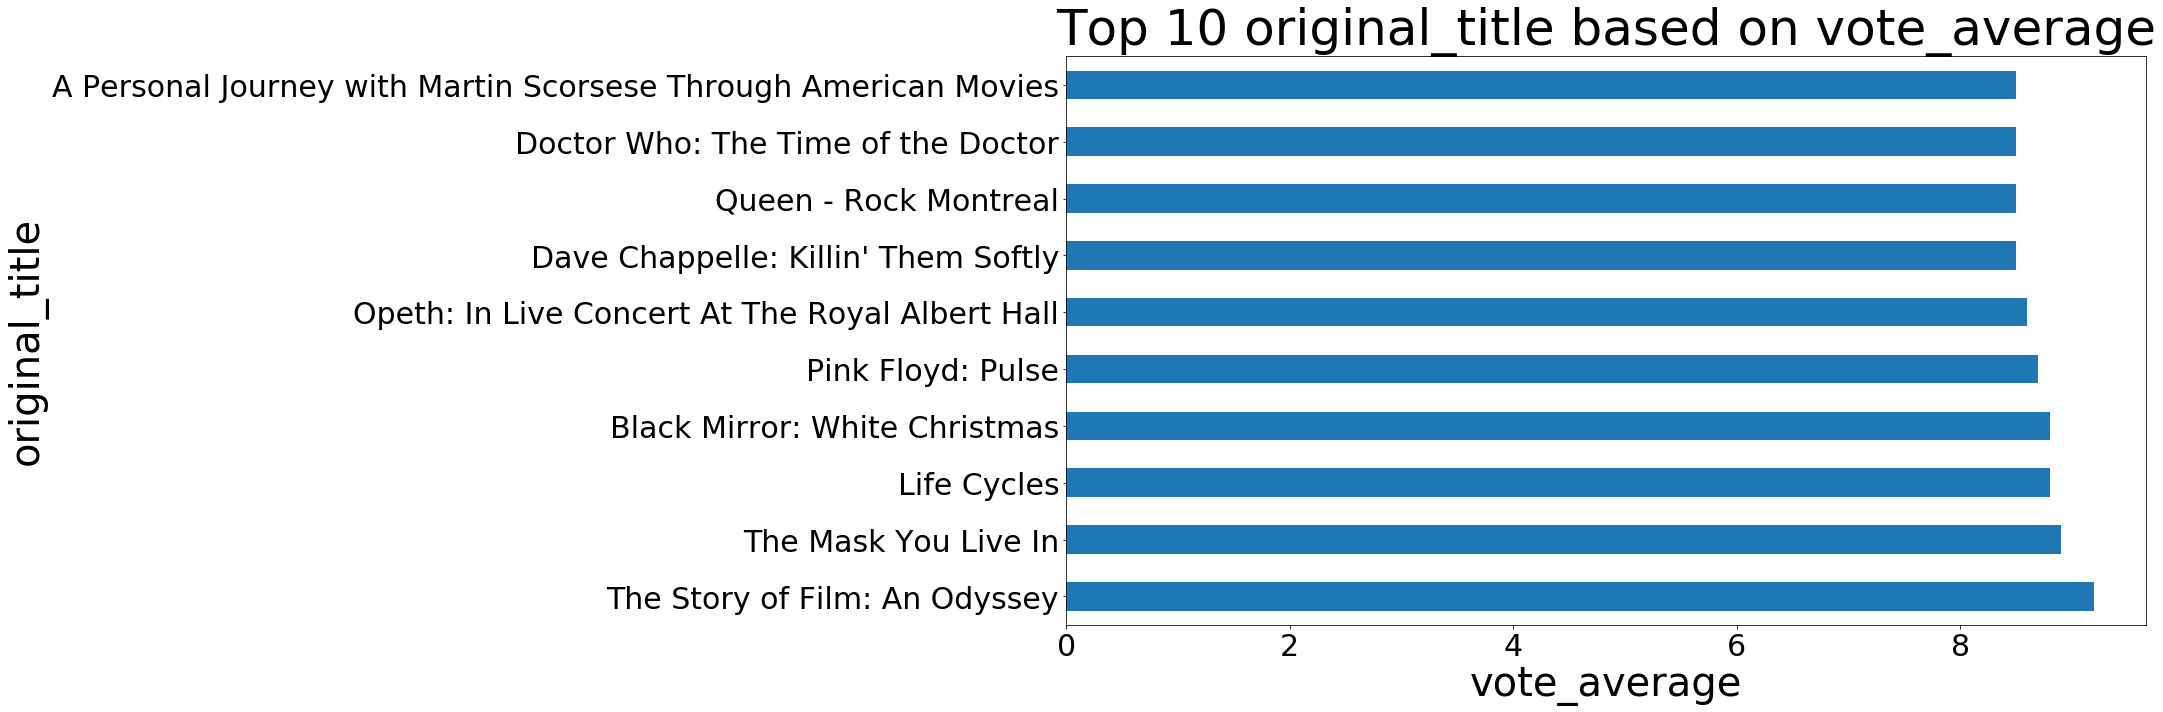

In [199]:
print(df.groupby('original_title').mean()['vote_average'].sort_values(ascending=False).iloc[:10])
bar_plot(df, 'original_title', 'vote_average')

#### The story of Film: An Odyssey has the highest rating of 9.2

### Research Question 2  (Which movies generates the highest revenues!)

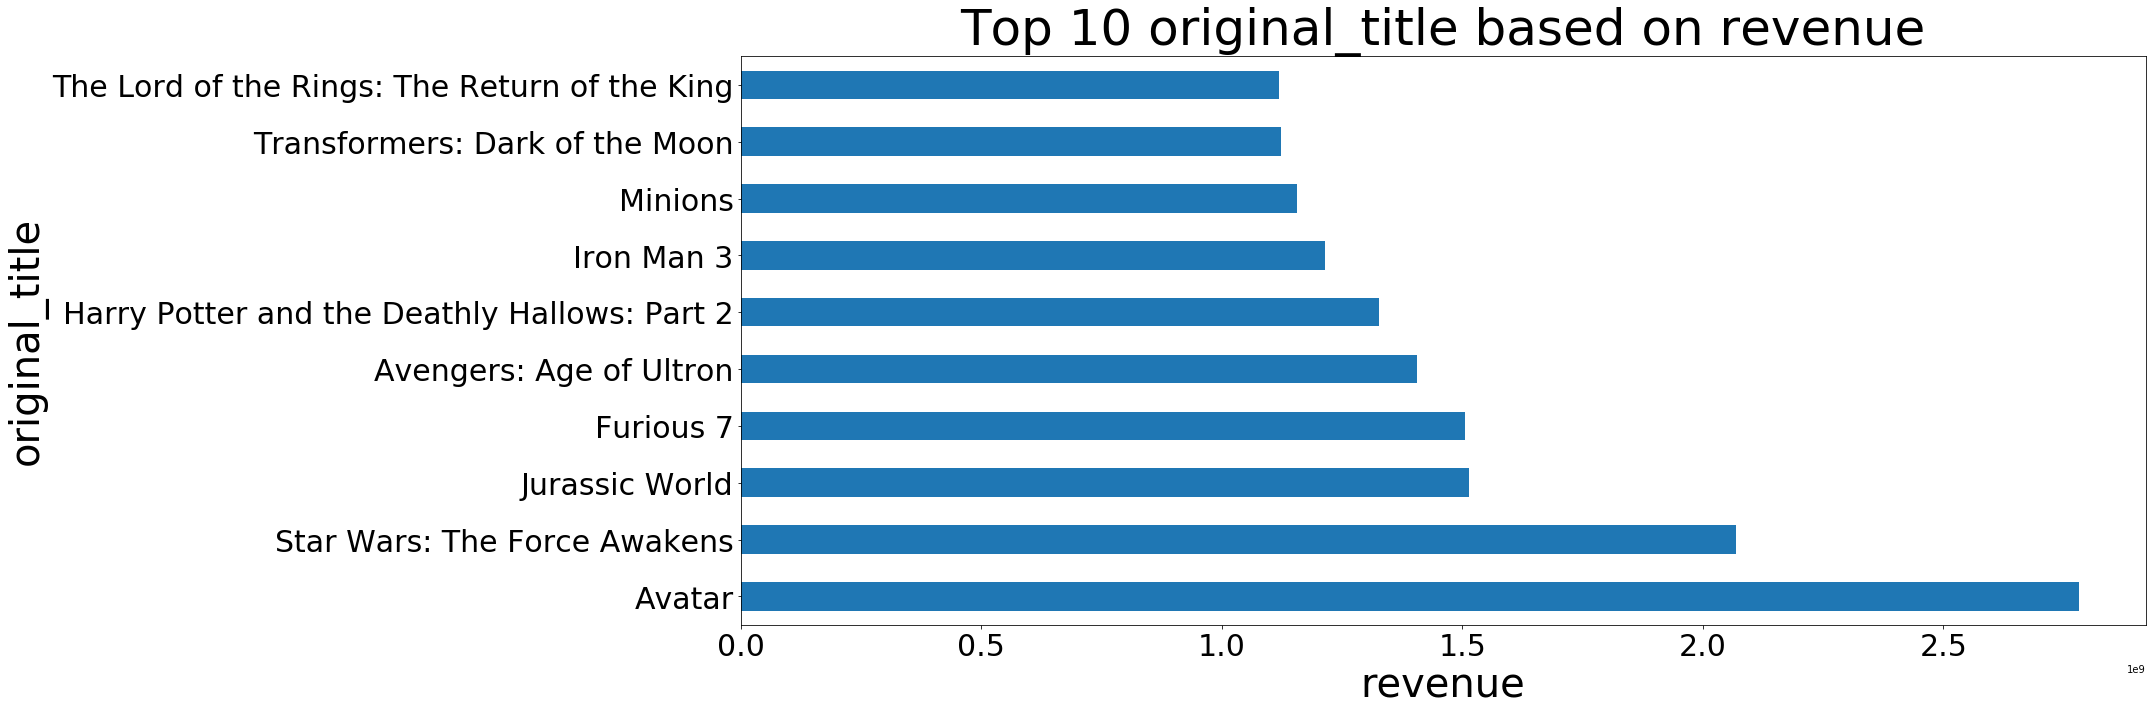

In [200]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

bar_plot(df, 'original_title', 'revenue')

###  (Which movies has the highest budget!)

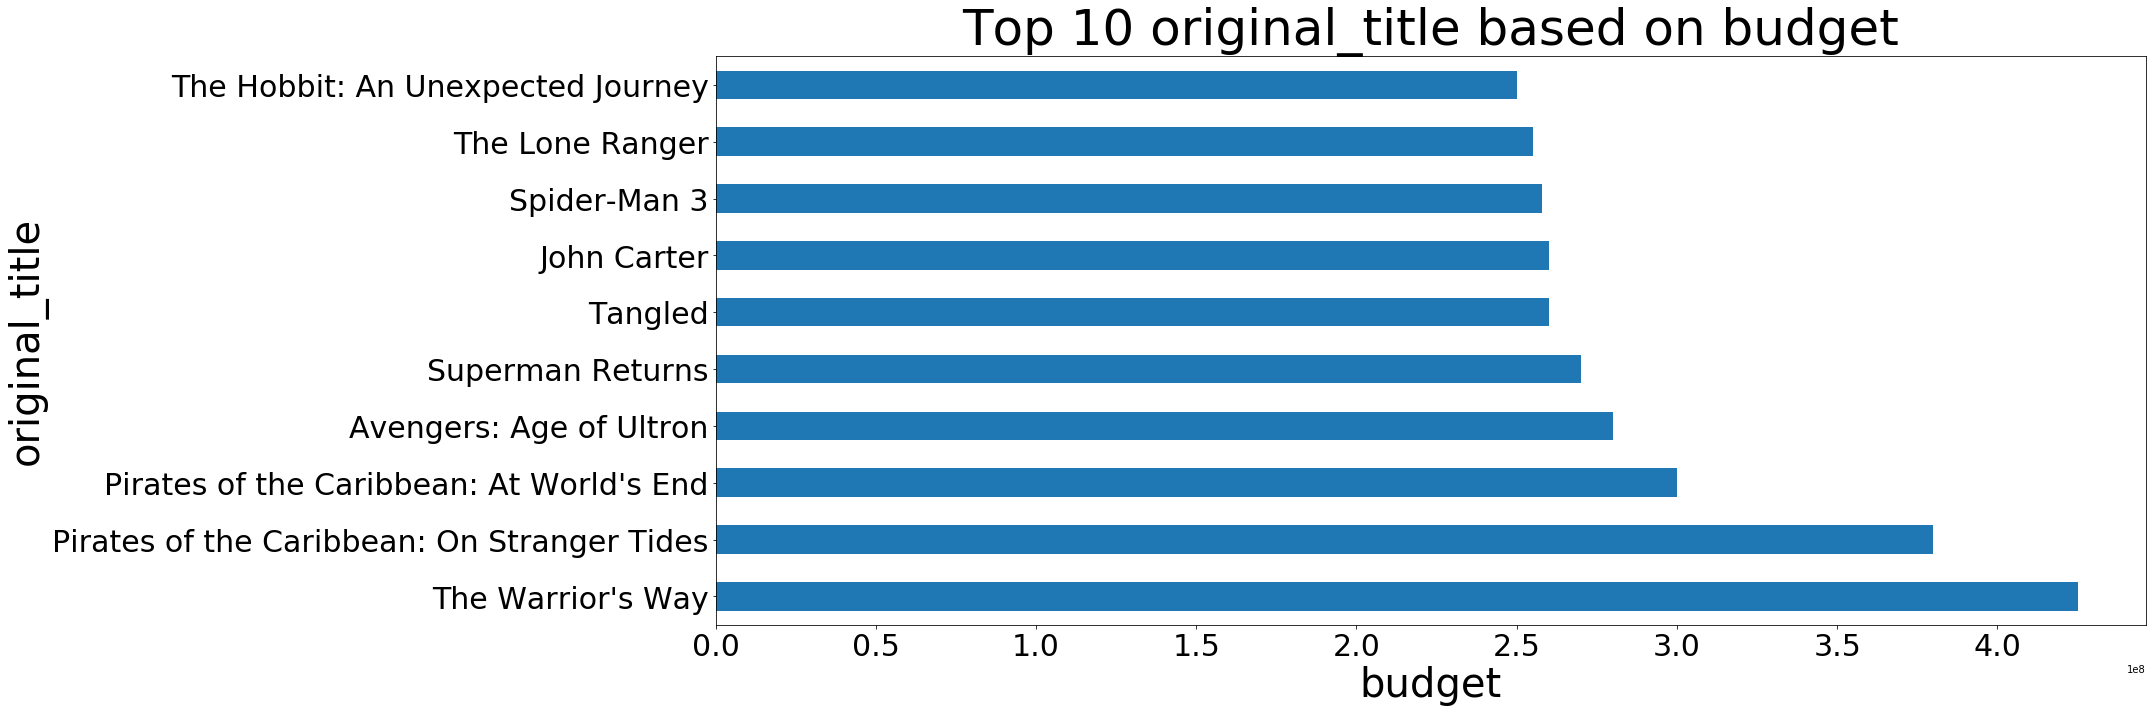

In [201]:
bar_plot(df, 'original_title', 'budget')

###  (Most popular movies!)

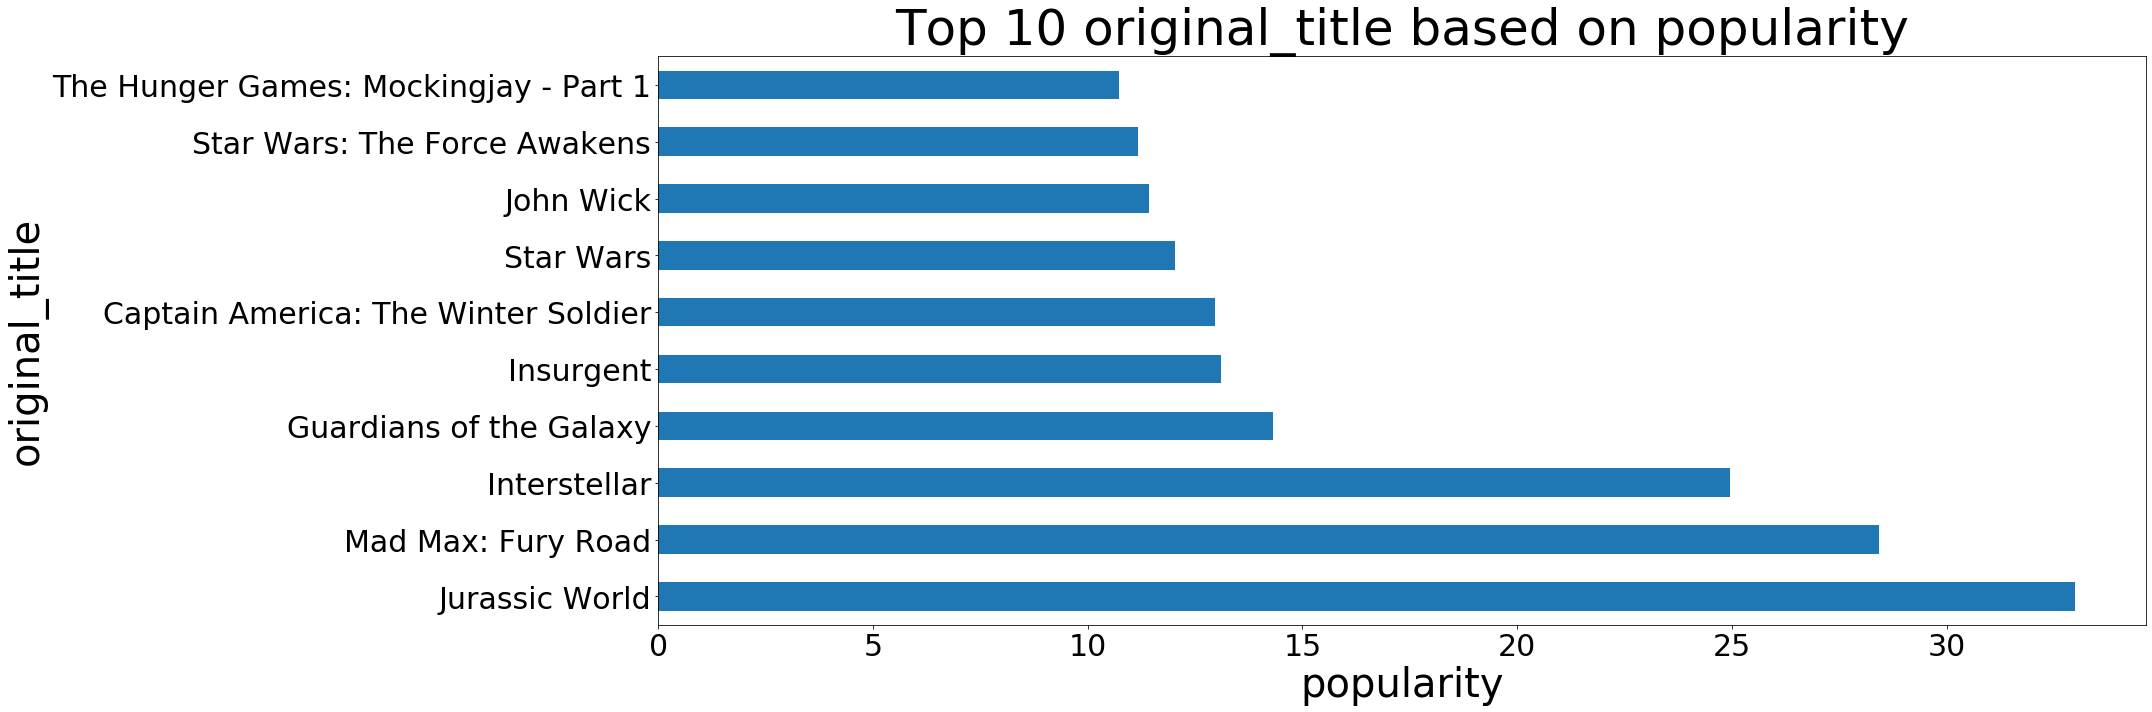

In [202]:
bar_plot(df, 'original_title', 'popularity')

### Which movies has the highest runtime

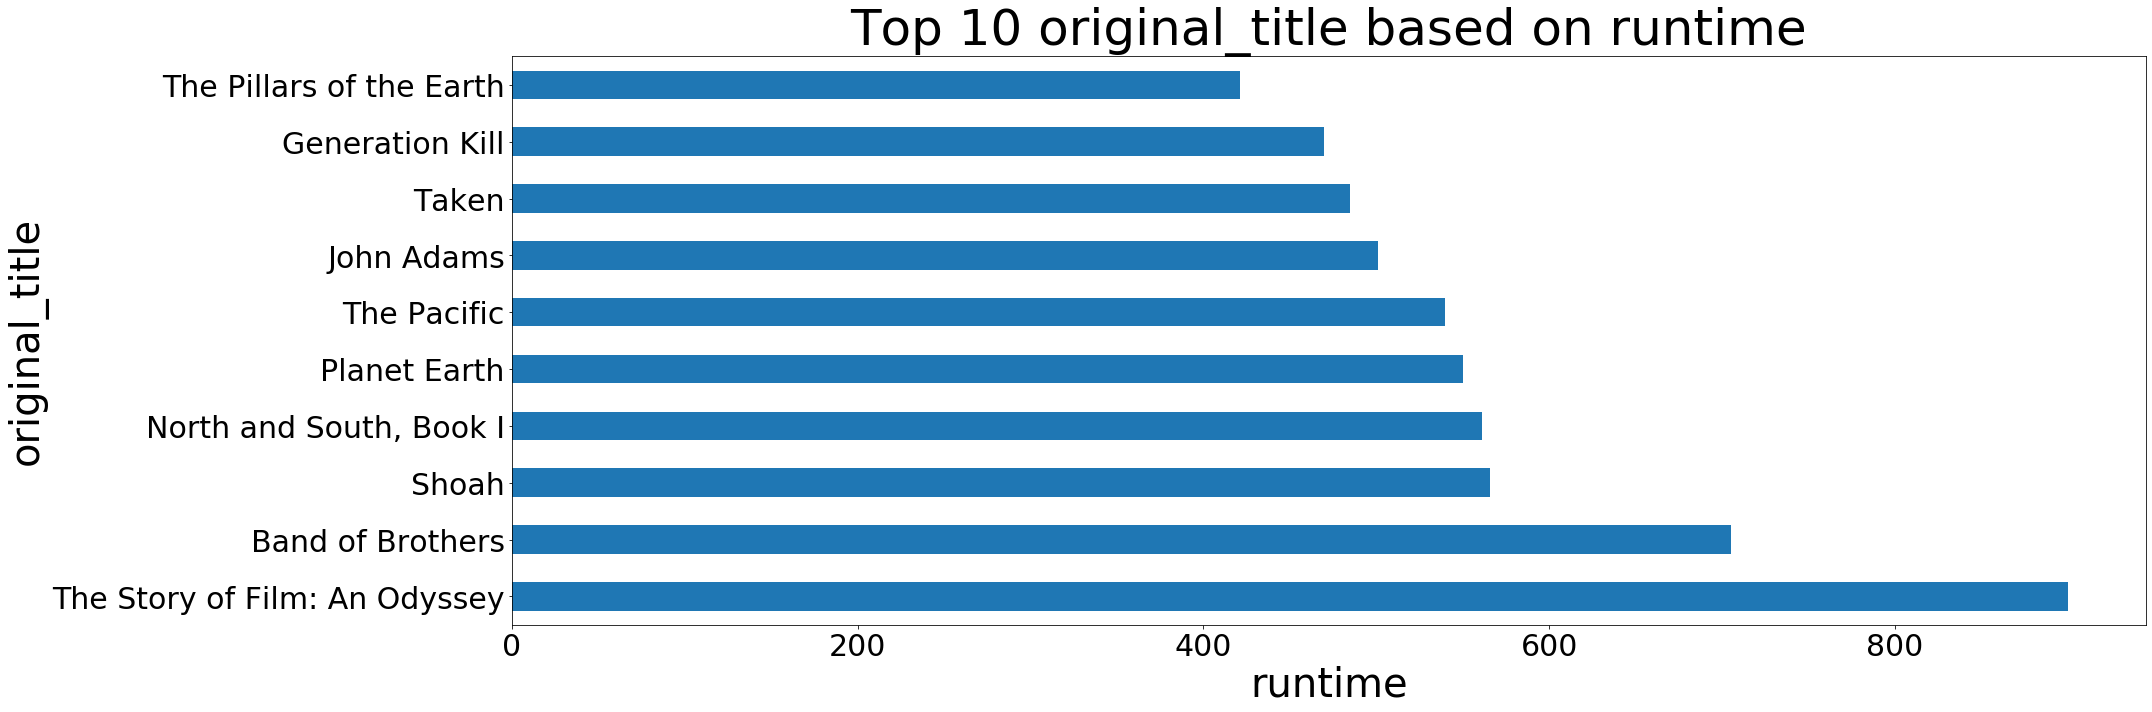

In [203]:
bar_plot(df, 'original_title', 'runtime')

### Director with the highest movie rating

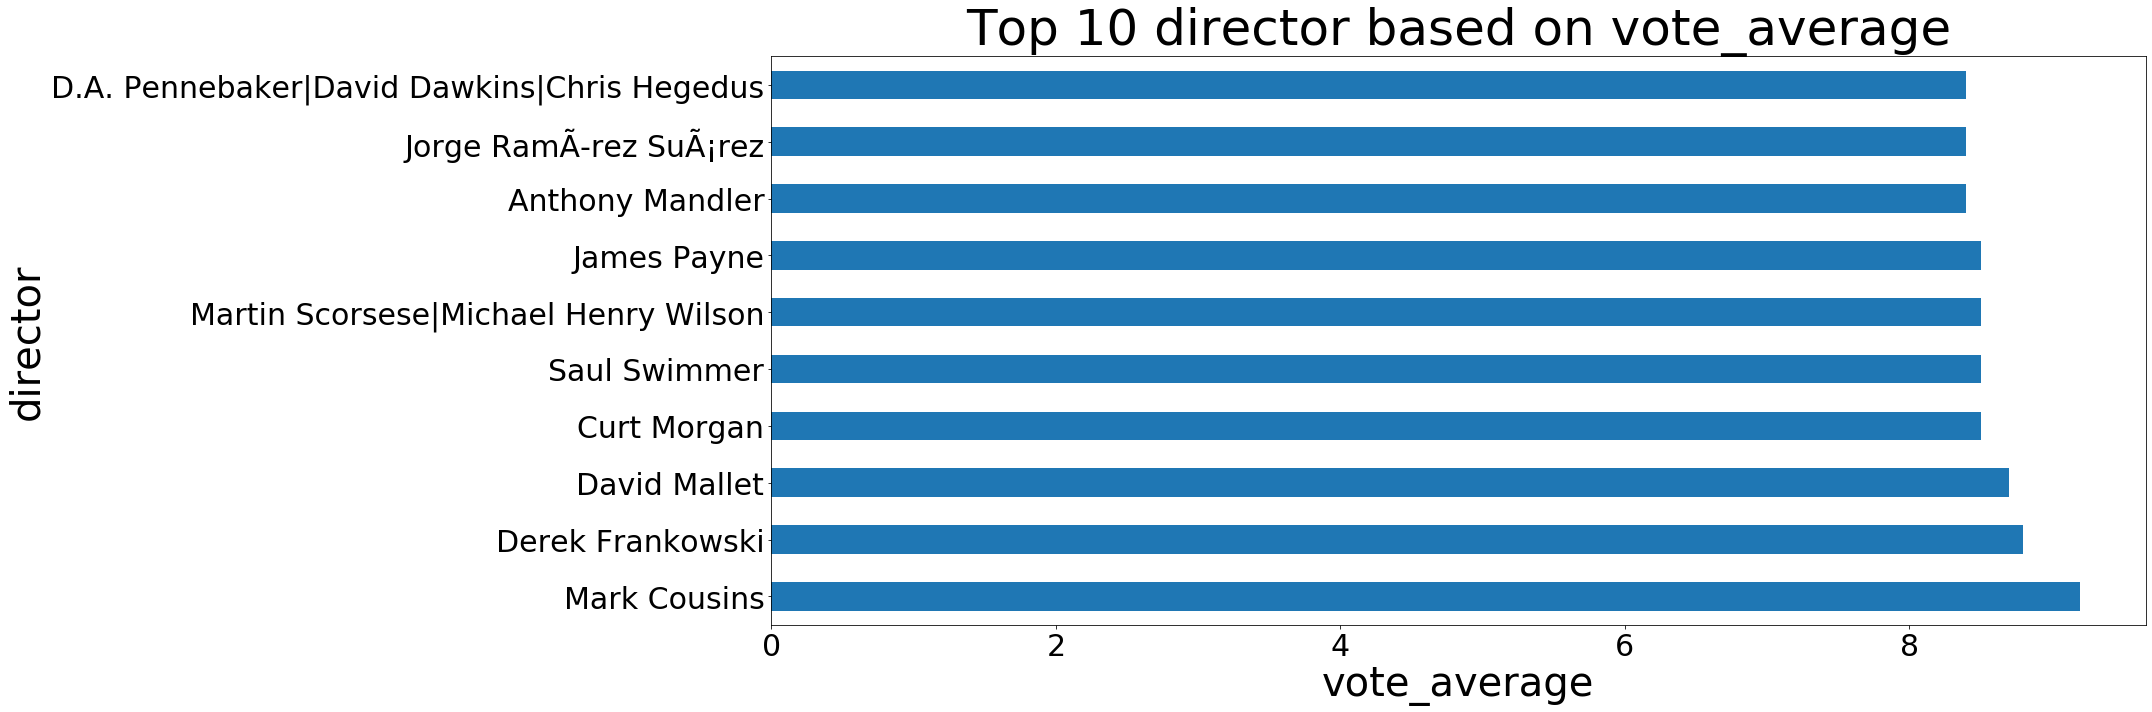

In [204]:
bar_plot(df, 'director', 'vote_average')

### director with the highest number of movies

In [205]:
def count(df, x, y):
    plt.figure(figsize=(30,10))
    df.groupby(x).count()[y].sort_values(ascending=False).iloc[:10].plot(kind='barh')
    
    
    plt.xlabel(y, fontsize=40)
    plt.ylabel(x, fontsize=40)
    plt.tick_params(labelsize=30)
    plt.tight_layout()

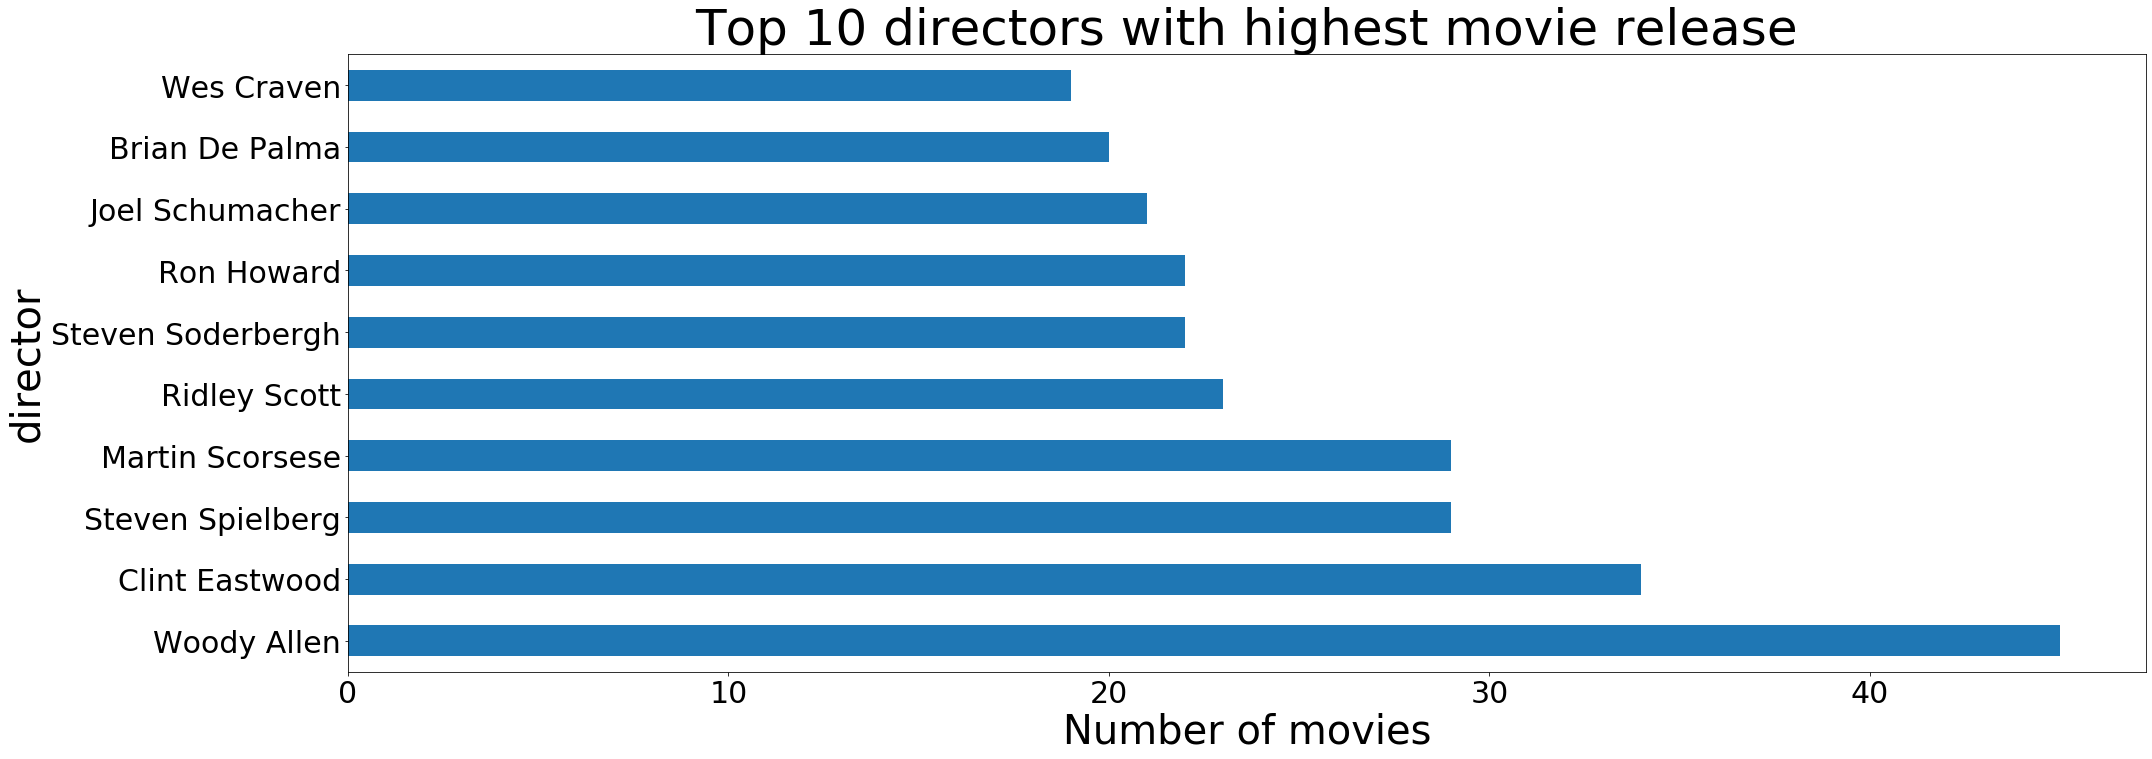

In [206]:
count(df, 'director', 'imdb_id')
plt.xlabel('Number of movies', fontsize=40)
plt.title('Top 10 directors with highest movie release', fontsize=50);


### Directors with the highest movie revenue

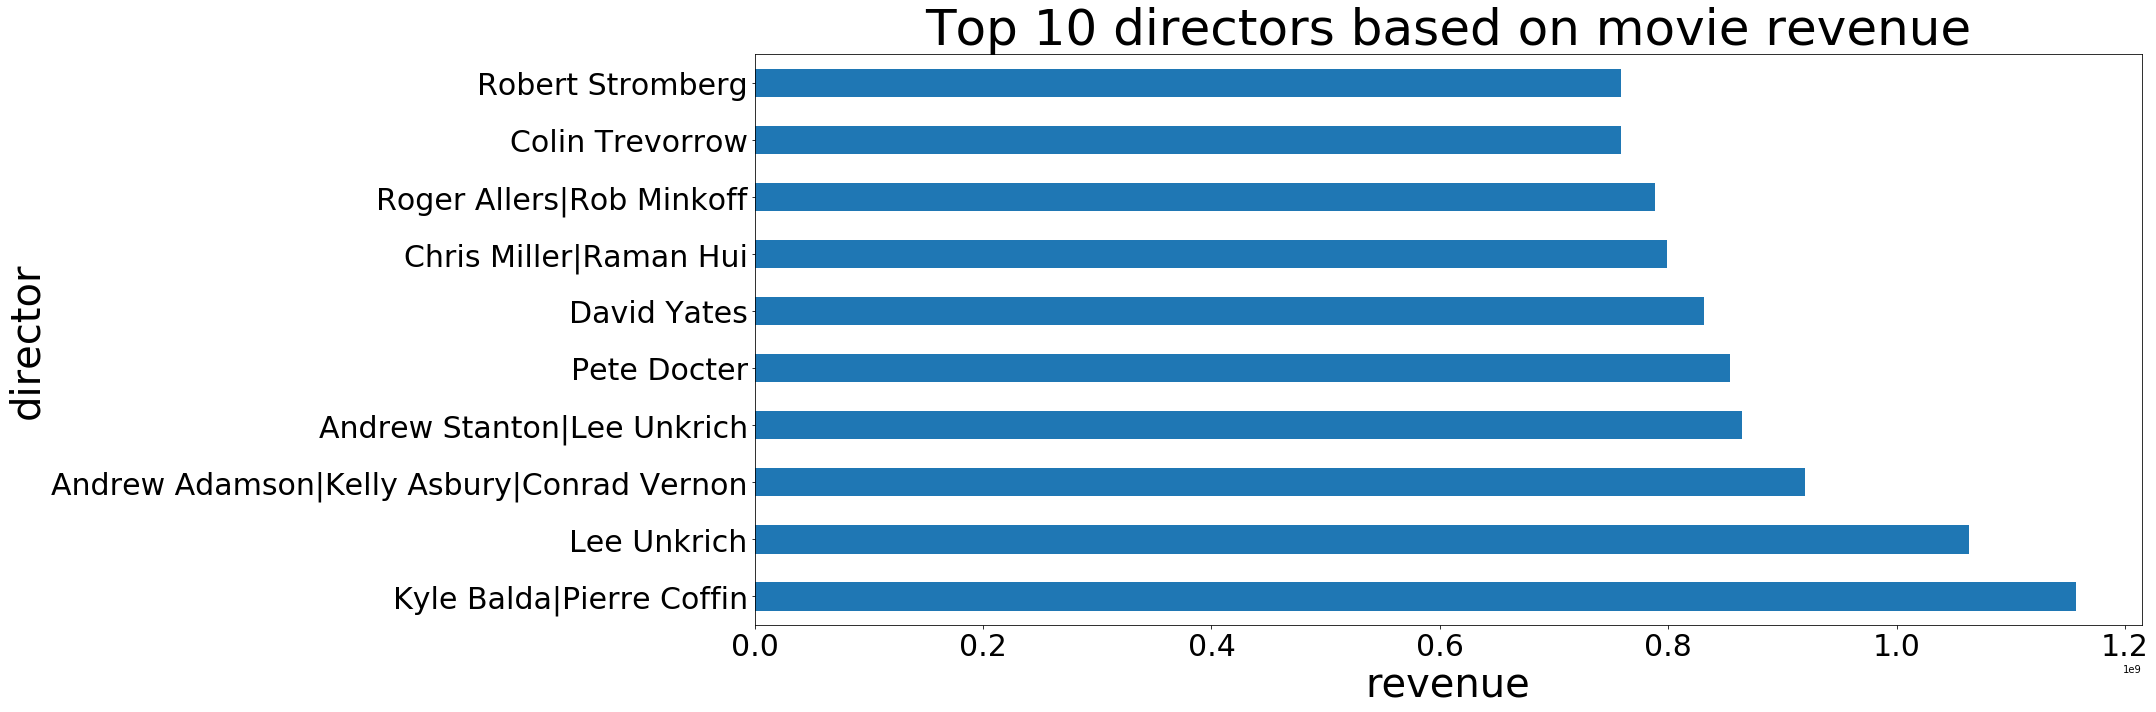

In [207]:
bar_plot(df, 'director', 'revenue')
plt.title('Top 10 directors based on movie revenue', fontsize=50);


### Director with the highest movies popularity

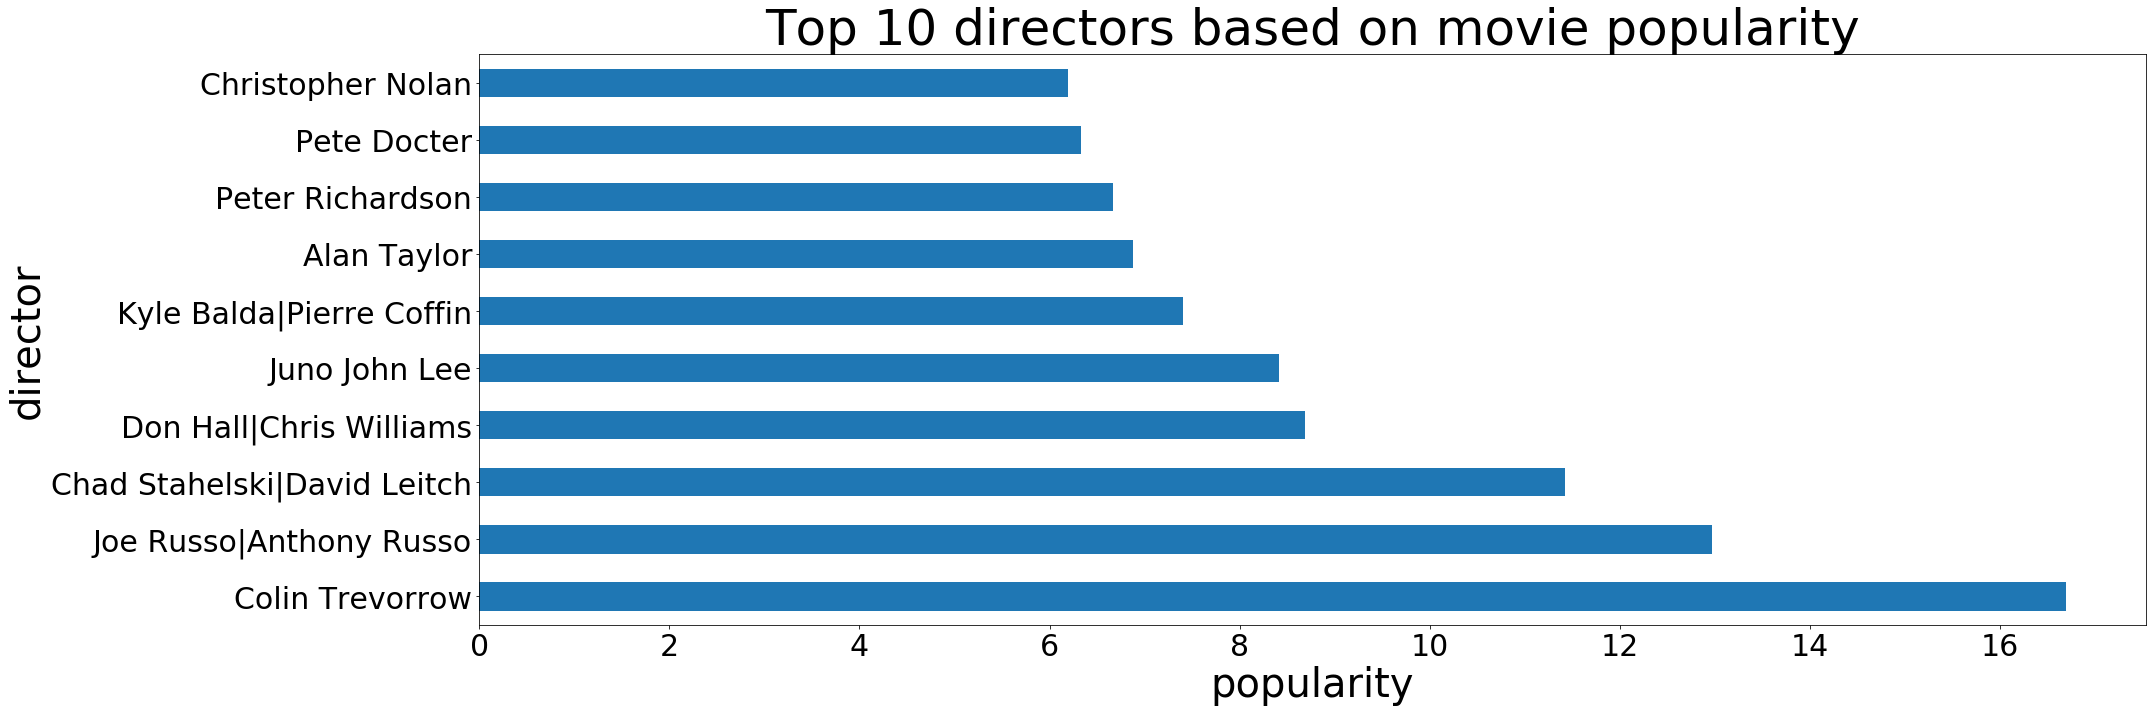

In [208]:
bar_plot(df, 'director', 'popularity')
plt.title('Top 10 directors based on movie popularity', fontsize=50);


### production company with the highest number of movies

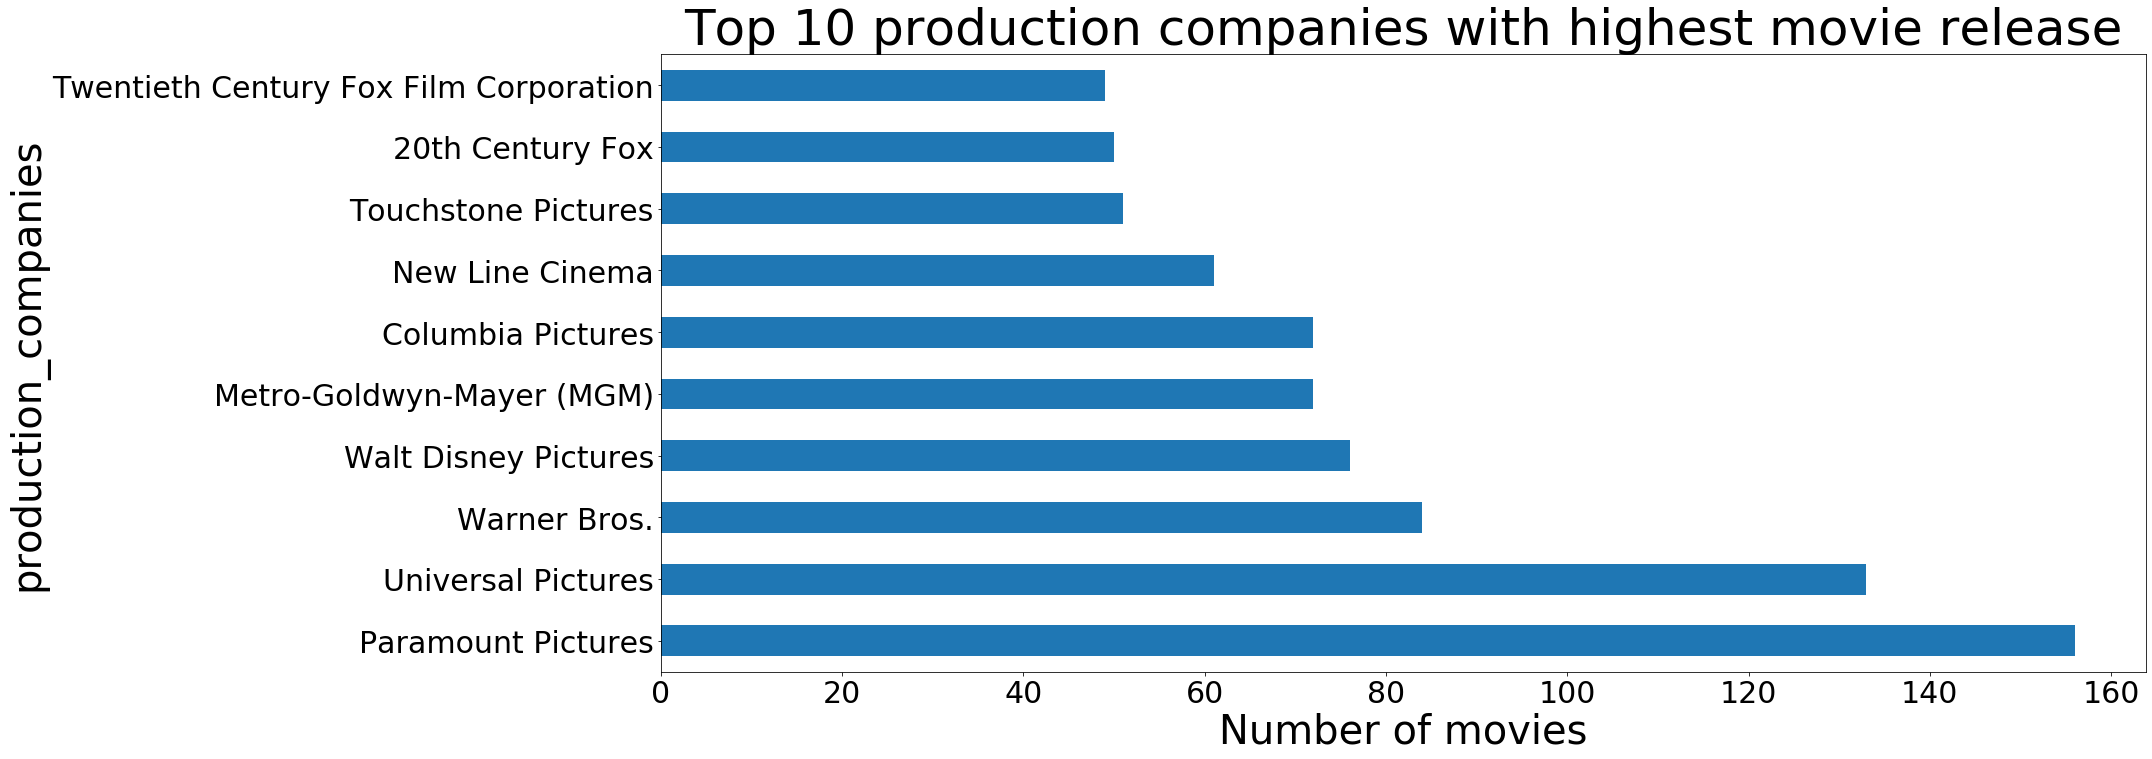

In [209]:
count(df, 'production_companies', 'imdb_id')
plt.xlabel('Number of movies', fontsize=40)
plt.title('Top 10 production companies with highest movie release', fontsize=50);


In [210]:
def split_strings(x):
    val = df[x].str.cat(sep='|')
    data = pd.Series(val.split('|'))
        
    data.value_counts(ascending=False).iloc[:10].plot(kind='barh')

## Which Genre has the highest movie release

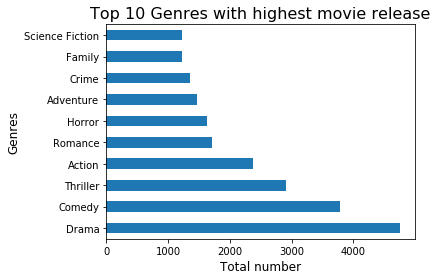

In [211]:
split_strings('genres')
plt.xlabel('Total number',fontsize=12)
plt.ylabel('Genres',fontsize=12)
plt.tick_params(labelsize=10)
plt.title('Top 10 Genres with highest movie release',fontsize=16)
plt.tight_layout()

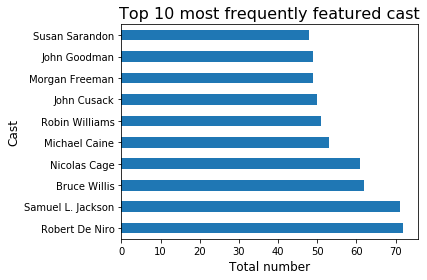

In [212]:
split_strings('cast')
plt.xlabel('Total number',fontsize=12)
plt.ylabel('Cast',fontsize=12)
plt.tick_params(labelsize=10)
plt.title('Top 10 most frequently featured cast',fontsize=16)
plt.tight_layout()

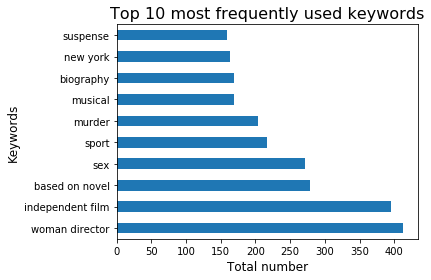

In [213]:
split_strings('keywords')
plt.xlabel('Total number',fontsize=12)
plt.ylabel('Keywords',fontsize=12)
plt.tick_params(labelsize=10)
plt.title('Top 10 most frequently used keywords',fontsize=16)
plt.tight_layout()

In [214]:
def line_plot(df, x, y):
    df.groupby(x).mean()[y].plot()
    

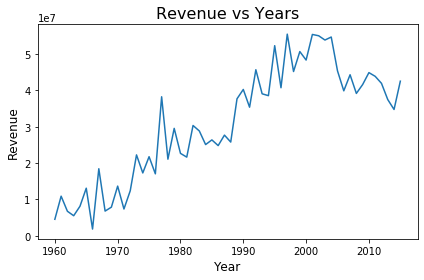

In [215]:
line_plot(df,'release_year', 'revenue')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Revenue',fontsize=12)
plt.tick_params(labelsize=10)
plt.title('Revenue vs Years',fontsize=16)
plt.tight_layout()

> **From the above cell the revenue for movies has been increasing over the year, but declines around year 2000. It then takes a further decrease around 2009 before increasing again around 2012/13**

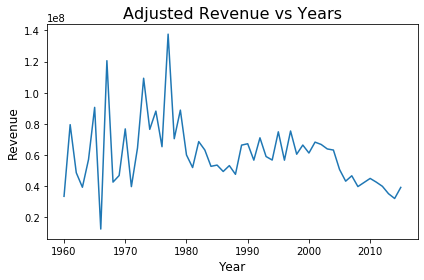

In [216]:
line_plot(df,'release_year', 'revenue_adj')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Revenue',fontsize=12)
plt.tick_params(labelsize=10)
plt.title('Adjusted Revenue vs Years',fontsize=16)
plt.tight_layout()

> **From the cell above showing revenue in terms of 2010 dollars, there has been a decline in the value of money**

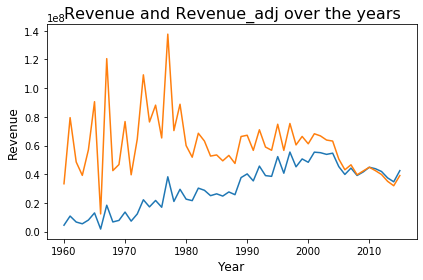

In [217]:
line_plot(df,'release_year', 'revenue')
line_plot(df,'release_year', 'revenue_adj')

plt.xlabel('Year',fontsize=12)
plt.ylabel('Revenue',fontsize=12)
plt.tick_params(labelsize=10)
plt.title('Revenue and Revenue_adj over the years',fontsize=16)
plt.tight_layout()

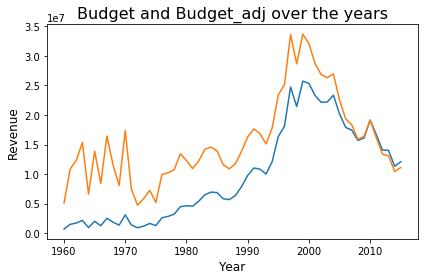

In [218]:
line_plot(df,'release_year', 'budget')
line_plot(df,'release_year', 'budget_adj')

plt.xlabel('Year',fontsize=12)
plt.ylabel('Revenue',fontsize=12)
plt.tick_params(labelsize=10)
plt.title('Budget and Budget_adj over the years',fontsize=16)
plt.tight_layout()

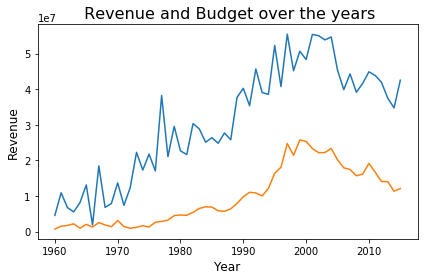

In [219]:
line_plot(df,'release_year', 'revenue')
line_plot(df,'release_year', 'budget')


plt.xlabel('Year',fontsize=12)
plt.ylabel('Revenue',fontsize=12)
plt.tick_params(labelsize=10)
plt.title(' Revenue and Budget over the years',fontsize=16)
plt.tight_layout()

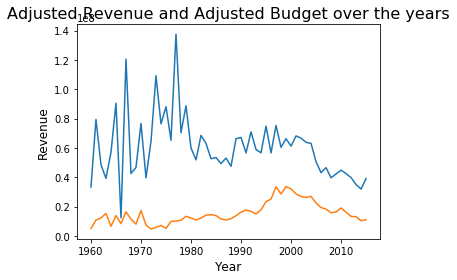

In [220]:
line_plot(df,'release_year', 'revenue_adj')
line_plot(df,'release_year', 'budget_adj')


plt.xlabel('Year',fontsize=12)
plt.ylabel('Revenue',fontsize=12)
plt.tick_params(labelsize=10)
plt.title('Adjusted Revenue and Adjusted Budget over the years',fontsize=16)
plt.tight_layout()

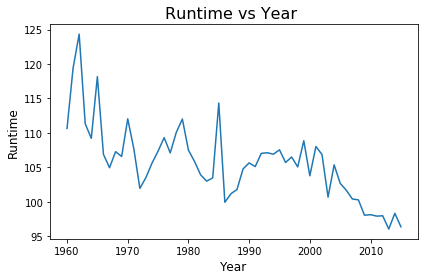

In [221]:
line_plot(df, 'release_year', 'runtime')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Runtime',fontsize=12)
plt.tick_params(labelsize=10)
plt.title('Runtime vs Year ',fontsize=16)
plt.tight_layout()

> **The duration of the movies has reduced over the years**

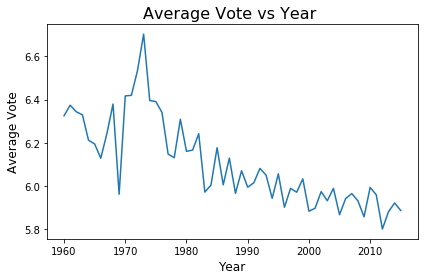

In [222]:
line_plot(df, 'release_year', 'vote_average')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Average Vote',fontsize=12)
plt.tick_params(labelsize=10)
plt.title('Average Vote vs Year ',fontsize=16)
plt.tight_layout()

> **Average votes of movies has also reduced over the years**

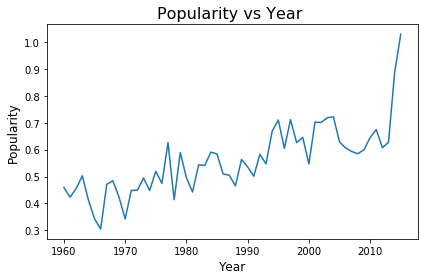

In [223]:
line_plot(df, 'release_year', 'popularity')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Popularity',fontsize=12)
plt.tick_params(labelsize=10)
plt.title('Popularity vs Year ',fontsize=16)
plt.tight_layout()

> **The cell above shows that movies have gained popularity over the years**

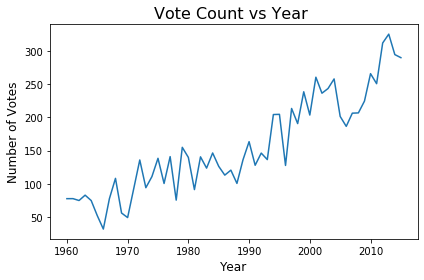

In [224]:
line_plot(df, 'release_year', 'vote_count')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of Votes',fontsize=12)
plt.tick_params(labelsize=10)
plt.title('Vote Count vs Year ',fontsize=16)
plt.tight_layout()

> **The number of votes for movies that is the number of people who votes have also increased over the year**

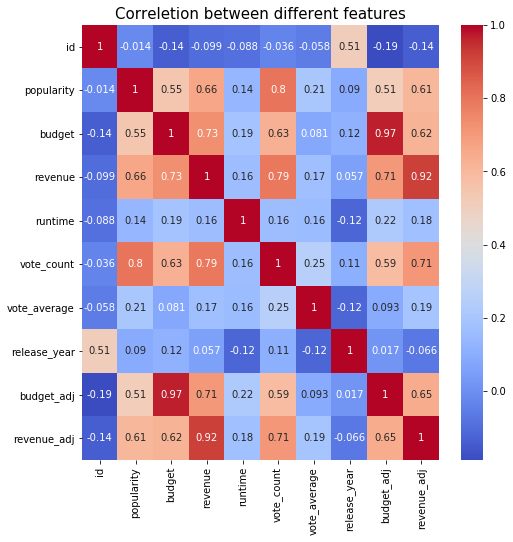

In [225]:
df_corr = df.corr()
plt.figure(figsize=(8,8))

sns.heatmap(df_corr, cmap='coolwarm', annot=True);
plt.title('Correletion between different features', fontsize=15);

> **Highly correlated features are Popularity vs revenue(0.66), vote count vs revenue(0.79), populartiy vs budget(0.55), vote count vs budget(0.63), budget vs revenue(0.73). This means  an increase in one of this features causes an increase in the other.**

<a id='conclusions'></a>
## Conclusions

> 
1. The movie with the highest rating is A story of Film: An Odyssey
2. Avatar is the movie that has generated the highest revenue
3. The movie with the highest budget is The Warrior's way
4. Jurassic World is the most popular movie
5. The movie with the highest runtime is A story of Film: An Odyssey
6. Mark Cousins directed the highest rated movie
7. Woody Allen has directed the highest number of movies
8. Colin Trevorrow directed the most popular movie
9. Paramont Pictures have produced the highest number of movies
10. The most popular genre is Drama
11. The most frequently featured cast is Robert De Niro
12. The most frequently used keyword is woman director
13. Movie Revenue has increased over the years 
14. Movie budgets have also increased over the years
15. Runtime has decreased over the years
16. Average votes  has reduced over the years
17. Popularity of movies have increased over the years
18. Number of votes have also increased over the years
